# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
<font color=red>Viernes 5 de Septiembre a las 13:00 hs</font> 

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Series de Tiempo de la Republica Argentina [link](https://datosgobar.github.io/series-tiempo-ar-api/applications/) , obtener dos series de indicadores del Ministerio de Agricultura, Ganadería y Pesca. En total, dicho Ministerio tiene 72 series anuales y pueden buscar dos serie de indicadores de su interés.

In [1]:
# Resolver acá

# librería
import pandas as pd

# carga de la base 
pesca = pd.read_csv("https://apis.datos.gob.ar/series/api/series?ids=39.1_TG_0_A_13&header=titles&format=csv")
maiz = pd.read_csv("https://apis.datos.gob.ar/series/api/series?ids=34.2_MTMAI_0_P_16&header=titles&format=csv")

# verificación
print(pesca)
print(maiz)

   indice_tiempo  total_general
0     1990-01-01     544910.900
1     1991-01-01     630005.500
2     1992-01-01     730953.800
3     1993-01-01     970079.000
4     1994-01-01     981753.500
5     1995-01-01    1146131.000
6     1996-01-01    1247396.000
7     1997-01-01    1340731.000
8     1998-01-01    1116823.800
9     1999-01-01    1017458.000
10    2000-01-01     855171.000
11    2001-01-01     878107.000
12    2002-01-01     882914.600
13    2003-01-01     839288.000
14    2004-01-01     873098.900
15    2005-01-01     861860.500
16    2006-01-01    1069947.800
17    2007-01-01     916167.100
18    2008-01-01     933231.000
19    2009-01-01     775352.500
20    2010-01-01     764960.100
21    2011-01-01     733061.500
22    2012-01-01     691476.800
23    2013-01-01     822068.374
24    2014-01-01     791152.400
25    2015-01-01     767649.200
26    2016-01-01     705777.900
27    2017-01-01     779125.100
28    2018-01-01     791636.100
29    2019-01-01     781304.300
30    20

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva ambas series de indicadores del Ministerio de Ganaderia y  presente en una tabla en su reporte. Dicha tabla debe mostrar: numero de observaciones, media, desvío standard, min, p25, mediana, p75 y max. Comente la tabla en **el reporte**.

In [2]:
# Resolver acá

#tablas descriptivas de ambas bases
pesca_resumen = pesca.describe()
maiz_resumen = maiz.describe()

# unión de tablas
tabla = pd.concat(
    [pesca_resumen, maiz_resumen],
    axis=1
)

# exportación a excel para el reporte
tabla.to_excel("tabla_parteA.xlsx", index=False)

#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos de tendencia distintos usando la librería Matplotlib (repasen Clase 3). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*.
Recuerde los principios de visualización de datos y comente dichas figuras en su reporte.

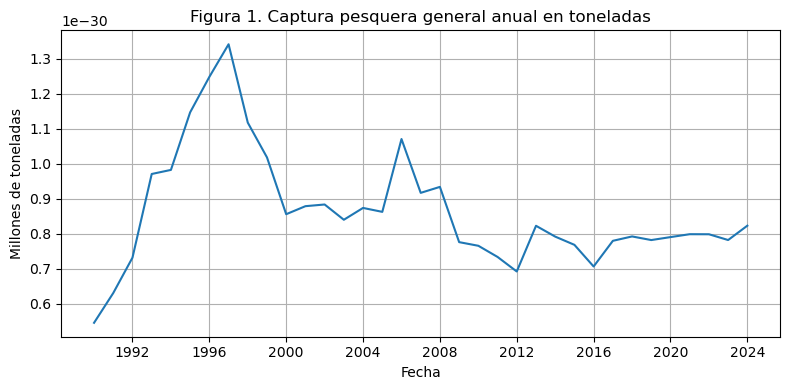

In [20]:
# Resolver acá estilo pyplot

#librerias
import numpy as np
import matplotlib.pyplot as plt

# eje x a fechas y eje y a millones para legibilidad
pesca['indice_tiempo'] = pd.to_datetime(pesca['indice_tiempo'])
pesca['total_general'] = pesca['total_general'] / 1e6

# gráfico con labels y estilo
plt.figure(figsize=(8,4))
plt.plot(pesca['indice_tiempo'], pesca['total_general'])
plt.title('Figura 1. Captura pesquera general anual en toneladas')
plt.xlabel('Fecha')
plt.ylabel('Millones de toneladas')
plt.grid(True)
plt.tight_layout()
plt.show()



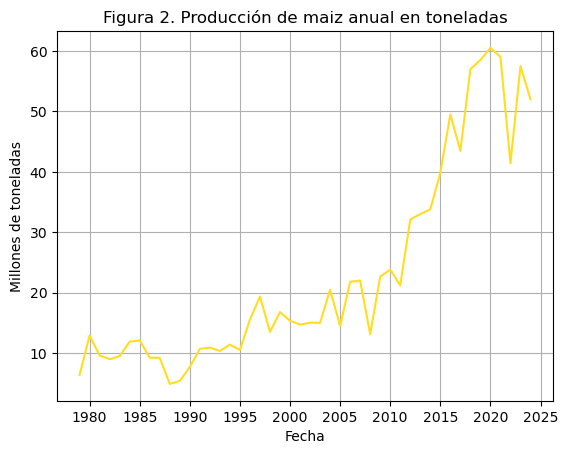

In [16]:
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 

# eje x a fechas y eje y a millones para legibilidad
maiz['indice_tiempo'] = pd.to_datetime(maiz['indice_tiempo'])
maiz['maiz_millones'] = maiz['maiz_toneladadas'] / 1e6

# creación del gráfico
fig, ax = plt.subplots()  

# serie de tiempo
ax.plot(maiz['indice_tiempo'], maiz['maiz_millones'], color = '#FFDE21')  

# modificamos labels y título
ax.set_xlabel("Fecha")
ax.set_ylabel("Millones de toneladas")
ax.set_title("Figura 2. Producción de maiz anual en toneladas")
ax.grid(True)

# gráfico final
plt.show()

### Parte B

#### Ejercicio 4 - Documentando noticias locales y en el extranjero
Eligan dos sitios web de noticias: uno de Argentina y uno del extranjero (puede ser en castellano o en inglés como el *New York Times*).

Utilicen herramientas de webscraping para obtener los **links** de las noticias de la portada en ambos diarios. Guarden cada titular con los links obtenidos en un dataframe. Por lo tanto, debe quedarles un dataframe de 4 columnas: una columna para noticias locales, otra para su link, otra columna de noticias extranjeras y una ultima columna de sus links. Luego, expórtenlo a un archivo de excel.

En el reporte este esta parte B:
1) Inserten una captura de pantalla de la pagina del diario extranjero y en Argentina de las cuales hacen el ejercicio de extraer titulares y sus links correspondientes. Esto servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.
2) Comenten brevemente (1 párrafo) las diferencias/similitudes al extraer titulares en diarios de Argentina versus diario extranjero
3) Comenten brevemente (1 párrafo) las dificultades y cómo resolvieron dichas dificultades.

*Nota*: es posible que logren obtener los links a las noticias sin el dominio: por ejemplo "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

#### Resolución del Ejercicio 4
En primer lugar, presentamos cómo está organizada la resolución para una lectura ordenada de este notebook:
- 4.1 Scraping del portal extranjero
- 4.2 Scraping del portal argentino
- 4.3 'Join' de los DataFrames
- 4.4 Reporte
<br>4.4.1 Capturas de pantalla
<br>4.4.2 Diferencias y similitudes en el web scraping de ambos portales
<br>4.4.3 Repaso de las dificultades encontradas y resolución de las mismas<br>

##### 4.1 Scraping del portal extranjero

###### Preparación de paquetes

In [3]:
#Importamos los paquetes relevantes
import pandas as pd # manipular DF's
import requests # HTTP requestor
from bs4 import BeautifulSoup # HTML parser
print("hola") # Pruebo que el kernel esté funcionando

hola


###### Screenshot para el reporte

Primero, intentamos pegar la 'ruta de acceso' del screenshot generado para que la imagen se imprima mediante la ejecución de esta celda en modo 'Markdown'.
Image
Vemos que no se imprime. Nos faltó llevar la imagen a la misma ubicación que la de este archivo.

In [4]:
imgarg = r"C:\Users\franc\Documents\Facultad\Big Data y Machine Learning\Captura de pantalla 2025-09-04 083027.png"
imgarg = imgarg.replace("\\","/")
print(f'<img src="{imgarg}">')

<img src="C:/Users/franc/Documents/Facultad/Big Data y Machine Learning/Captura de pantalla 2025-09-04 083027.png">


In [42]:
import os
# Verificar si el archivo existe
file_path = "Captura de pantalla 2025-09-04 083027.png"
print(f"¿Existe el archivo? {os.path.exists(file_path)}")

# Ver qué archivos hay en la carpeta actual
print("Archivos en la carpeta:")
for file in os.listdir("."):
    if file.endswith(('.png', '.jpg', '.jpeg')):
        print(f"  - {file}")

¿Existe el archivo? True
Archivos en la carpeta:
  - Captura de pantalla 2025-09-04 083027.png


In [43]:
# from IPython.display import Image, display
# display(Image("Captura de pantalla 2025-09-04 083027.png", width=400))

###### Parseo del HTML vía código

In [61]:
# Presentamos las URLs y su contenido HTML
# urlarg = INSERTAR LINK
urlext = "https://www.washingtonpost.com/" #URL Extranjera

In [62]:
#Código para imprimir el HTML
def imprimirHTML(link):
    rext = requests.get(link)
    contenido_ext = rext.content
    soupext = BeautifulSoup(contenido_ext,"html.parser")
    print(soupext)

In [46]:
# imprimirHTML("https://www.washingtonpost.com/") # Si bien definí el link más arriba con la variable 'urlext', defino una función para probar varios links más rápido

Por algún motivo, la ejecución de la "sopa" no imprime nada, pero tampoco devuelve error. Sospechamos que puede ser algo propio de Washington Post, como si tuviera algún tipo de protección.

In [63]:
# Mejoro la función creada para que reporte error de acceso si es que existe:
def imprimirHTML(link):
    try:
        response = requests.get(link)
        response.raise_for_status()  # Lanza error si hay problema HTTP
        contenido = response.content
        soup = BeautifulSoup(contenido, "html.parser")
        print(soup)
    except requests.exceptions.RequestException as e:
        print(f"Error al acceder a {link}: {e}")

# imprimirHTML("https://www.washingtonpost.com/")

Tampoco avanza, e incluso un simple 'print("hola")' queda sin cargare: debe ser un tema de permisos del Washington Post.
Comentario adicional: al reiniciar el Kernel, el parseo del HTML del Washington Post devolvió un 'TimeoutError'.

Probamos la función con un diario de menor relevancia:

In [ ]:
imprimirHTML("https://www.nzherald.co.nz/sport/rugby/") # New Zealand Rugby Herald

Funciona, así que vamos a intentar parsear el HTML del Washington Post manualmente.

###### Parseo del HTML (vía manual)

In [5]:
# 1. Copio el HTML completo del Washington Post desde la Web
# 2. Abro un bloc de notas en la misma ubicación de este notebook, pego el HTML y lo guardo como archivo .html
# 3. Leo el HTML desde este notebook

with open("washington_post.html", "r", encoding="utf-8") as f:
    html_doc = f.read()

print(html_doc[:500])  # muestra solo los primeros 500 caracteres

<html lang="en" data-scrim-state="closed"><head><script src="https://s0.2mdn.net/instream/video/client.js" async="" type="text/javascript"></script><script type="text/javascript" async="" src="https://collector.brandmetrics.com/c.js?siteid=1ce8beea-3b4c-4621-93e6-7e1ee915a33b&amp;toploc=www.washingtonpost.com&amp;rnd=2096250"></script><link rel="icon" href="https://www.washingtonpost.com/favicon.svg" type="image/svg+xml"><link rel="icon" href="https://www.washingtonpost.com/touch-icon-iphone.png


Ahora, el objetivo es armar un DataFrame de 2 columnas:
 - Columna con los títulos de la página de inicio
 - Columna con los respectivos links a las notas completas de dichos títulos

###### Traer todos los elementos H2 del HTML
(Se trae el código crudo y después se lo limpia, para quedarnos sólo con los títulos, los links y así armar el DataFrame)

In [6]:
# 1. Leer el HTML desde tu archivo
with open("washington_post.html", "r", encoding="utf-8") as f:
    contenido = f.read()

# 2. Crear el objeto BeautifulSoup
soup = BeautifulSoup(contenido, "html.parser")

# 3. Buscar todos los elementos <h2>
h2_elements = soup.find_all("h2")

# 4. Mostrar el resultado
print("\n", h2_elements)


 [<h2 class="wpds-c-iiQaMf wpds-c-iiQaMf-ibUhiPg-css"><a data-pb-local-content-field="web_headline" href="https://www.washingtonpost.com/health/2025/09/04/rfk-vaccines-cdc-hearing/"><span>A top Republican senator presses RFK Jr. on vaccines: ‘I’ve grown deeply concerned’</span></a></h2>, <h2 class="wpds-c-iiQaMf wpds-c-iiQaMf-ihMULTC-css"><a data-pb-local-content-field="web_headline" href="https://www.washingtonpost.com/health/2025/09/04/coronavirus-vaccines-mandates-state-divisions/"><span>Kennedy drives a wedge between red and blue states on vaccines</span></a></h2>, <h2 class="wpds-c-iiQaMf wpds-c-iiQaMf-ihMULTC-css"><a data-pb-local-content-field="web_headline" href="https://www.washingtonpost.com/health/2025/09/04/coronavirus-vaccines-access-stories/"><span>Tell The Post: Are you getting a coronavirus vaccine?</span></a></h2>, <h2 class="wpds-c-iiQaMf wpds-c-iiQaMf-ibUhiPg-css"><a data-pb-local-content-field="web_headline" href="https://www.washingtonpost.com/business/2025/09/04/

In [13]:
# Mediante un bucler 'for' creamos el DataFrame

titulos = []
links = []

for h2 in h2_elements:
    h2_text = h2.text.strip()
    a_tag = h2.find("a")
    if a_tag:
        h2_link = a_tag.get('href')
    else:
        h2_link = None
    titulos.append(h2_text)
    links.append(h2_link)

dfext = pd.DataFrame({"Titulo_ext": titulos, "Link_ext": links})
dfext

,Titulo_ext,Link_ext
0,A top Republican senator presses RFK Jr. on va...,https://www.washingtonpost.com/health/2025/09/...
1,Kennedy drives a wedge between red and blue st...,https://www.washingtonpost.com/health/2025/09/...
2,Tell The Post: Are you getting a coronavirus v...,https://www.washingtonpost.com/health/2025/09/...
3,Trump’s pick for Fed board plans to keep White...,https://www.washingtonpost.com/business/2025/0...
4,Trump officials ask Supreme Court to quickly a...,https://www.washingtonpost.com/politics/2025/0...
5,See where tariffs are driving up prices on hou...,https://www.washingtonpost.com/business/2025/0...
6,Pentagon approves use of Navy base for Chicago...,https://www.washingtonpost.com/national-securi...
7,"D.C. attorney general sues Trump, seeks halt t...",https://www.washingtonpost.com/dc-md-va/2025/0...
8,The pigeon heist: How million-dollar racing bi...,https://www.washingtonpost.com/world/interacti...
9,The health risks from plastics almost nobody k...,https://www.washingtonpost.com/climate-environ...


Como el notebook no muestra los links completos en el output de la celda, los desempacamos para revisar si son funcionales.

In [8]:
dfext['Link'].to_list() # Sin el Método to_list(), el notebook imprime sólo una parte de los links, y de esa forma no funcionan

KeyError: 'Link'

Ahora, ya tenemos creado el DataFrame de los titulares extranjeros con los links funcionando correctamente.

##### 4.2 Scraping del portal argentino

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página principal de Infobae
url = "https://www.infobae.com/"

# Header para simular que somos un navegador
headers = {"User-Agent": "Mozilla/5.0"}

# 1. Hacemos la solicitud HTTP para obtener el HTML de la página
response = requests.get(url, headers=headers)

# 2. Verificamos si la solicitud fue exitosa (código 200 = OK)
if response.status_code == 200:
    # 3. Usamos BeautifulSoup para "parsear" (analizar) el HTML
    soup = BeautifulSoup(response.text, "html.parser")

    # 4. Creamos una lista donde vamos a guardar los titulares y links
    articulos = []

    # 5. Buscamos todos los elementos <h2>, que en Infobae suelen contener titulares
    for h in soup.find_all("h2"):
        # Buscamos el <a> (enlace) que envuelve al titular
        a_tag = h.find_parent("a")
        
        # Verificamos que exista el enlace y que tenga atributo "href" (la URL)
        if a_tag and a_tag.get("href"):
            titulo = h.get_text(strip=True)   # texto del titular
            link = a_tag["href"]              # enlace a la noticia
            
            # Guardamos el resultado en forma de diccionario
            articulos.append({"titular_nac": titulo, "link_nac": link})

    # 6. Convertimos la lista de diccionarios en un DataFrame de Pandas
    infobae = pd.DataFrame(articulos)

    # 7. Mostramos los primeros 10 resultados
    print(infobae.head(10))

else:
    # Si la solicitud no fue exitosa, mostramos el código de error
    print("Error al recuperar la página. Código de estado:", response.status_code)



                                         titular_nac  \
0  Ley de emergencia en discapacidad: el Gobierno...   
1  Milei habló de "empate técnico" y despertó el ...   
2  Messi hizo dos goles en su despedida y la Arge...   
3  El video de Diego Spagnuolo y Victoria Villarr...   
4  Axel Kicillof: "Según Milei, veníamos quince p...   
5  Múnich sangriento: cuando un grupo de terroris...   
6  Entre la fama y la introspección: cómo Brenda ...   
7  Messi habló tras su último partido oficial en ...   
8  10 frases de Scaloni: el plan para que a Messi...   
9  Tres perlitas de la noche de Messi: el guiño a...   

                                            link_nac  
0  /politica/2025/09/05/ley-de-emergencia-en-disc...  
1  /economia/2025/09/05/milei-hablo-de-empate-tec...  
2  /deportes/2025/09/04/la-seleccion-argentina-de...  
3  /politica/2025/09/05/el-video-de-diego-spagnuo...  
4  /politica/2025/09/05/axel-kicillof-segun-milei...  
5  /historias/2025/09/05/munich-sangriento-cuando... 

##### 4.3 'Join' de los DataFrames

In [24]:
# Unimos los dataframes y limitamos los de infobae para que queden parejos
df_concat = pd.concat([dfext, infobae.iloc[:23]], axis=1)
print(df_concat)
# Guardamos en Excel
df_concat.to_excel("tabla_parteB.xlsx", index=False)


                                           Titulo_ext  \
0   A top Republican senator presses RFK Jr. on va...   
1   Kennedy drives a wedge between red and blue st...   
2   Tell The Post: Are you getting a coronavirus v...   
3   Trump’s pick for Fed board plans to keep White...   
4   Trump officials ask Supreme Court to quickly a...   
5   See where tariffs are driving up prices on hou...   
6   Pentagon approves use of Navy base for Chicago...   
7   D.C. attorney general sues Trump, seeks halt t...   
8   The pigeon heist: How million-dollar racing bi...   
9   The health risks from plastics almost nobody k...   
10                Ranking the best players in the NFL   
11  An absurd outcome in each NFL division that co...   
12  What’s the best frozen pizza brand? Our taste ...   
13  Answers to your questions, powered by our repo...   
14  The labor shortage is worsening. Iron cards ar...   
15  A Democratic dark horse visited Pennsylvania. ...   
16  What happens if Latin Ameri

##### 4.4 Reporte

###### 4.4.1 Capturas de pantalla

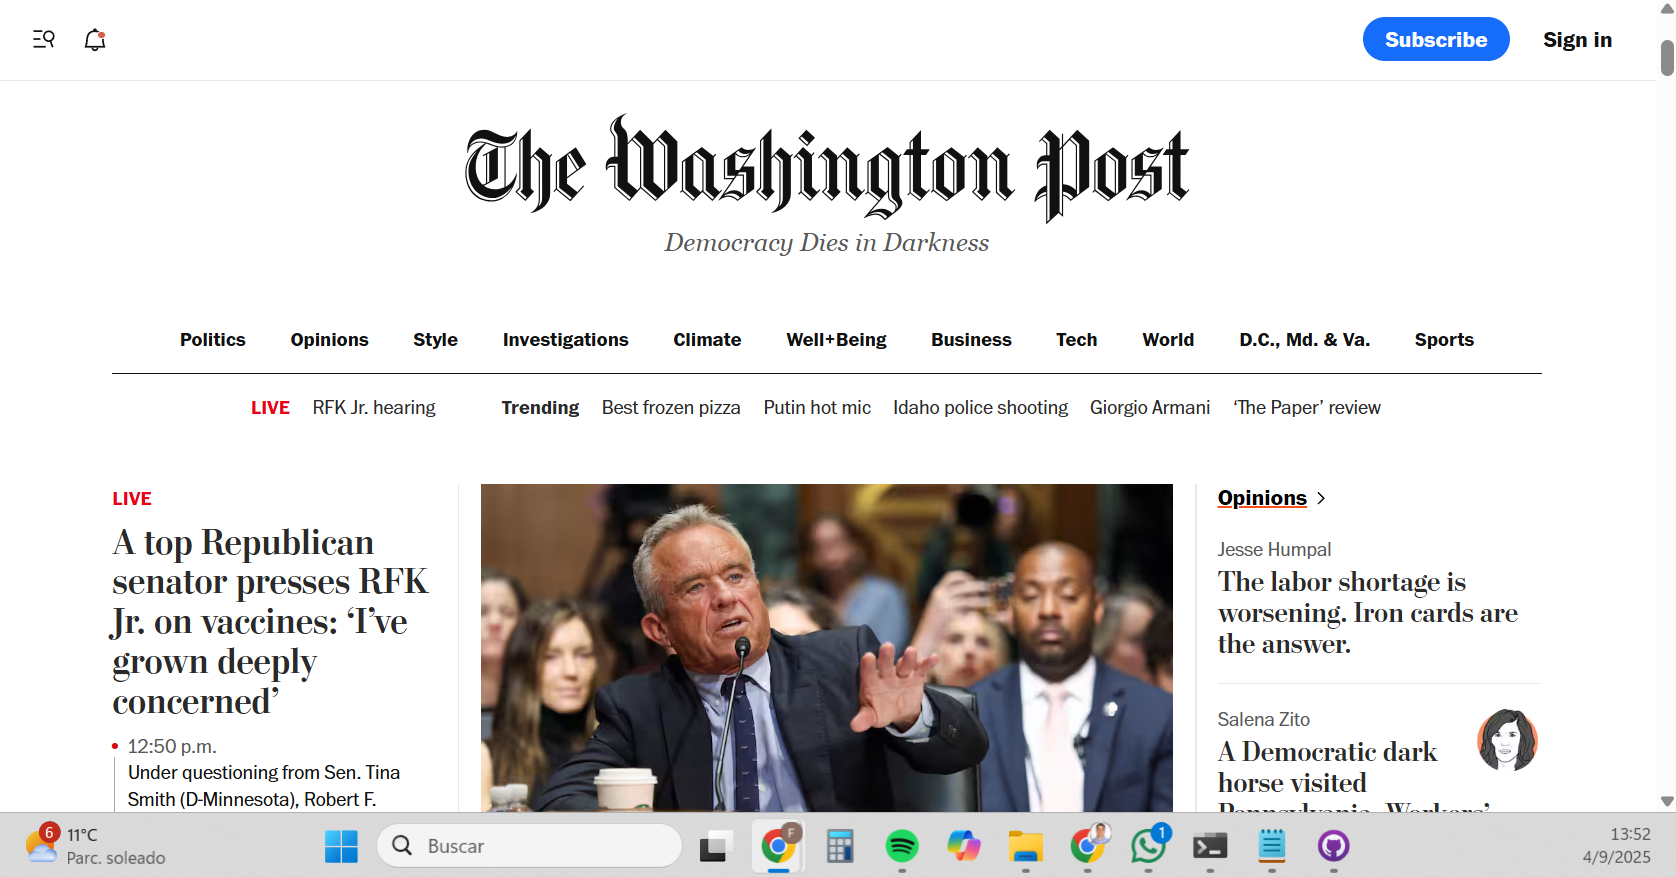

In [ ]:
# Captura del diario extranjero

from IPython.display import Image, display
display(Image("Captura de pantalla 2025-09-04 135303.png", width=400))

# Captura del diario argentino:
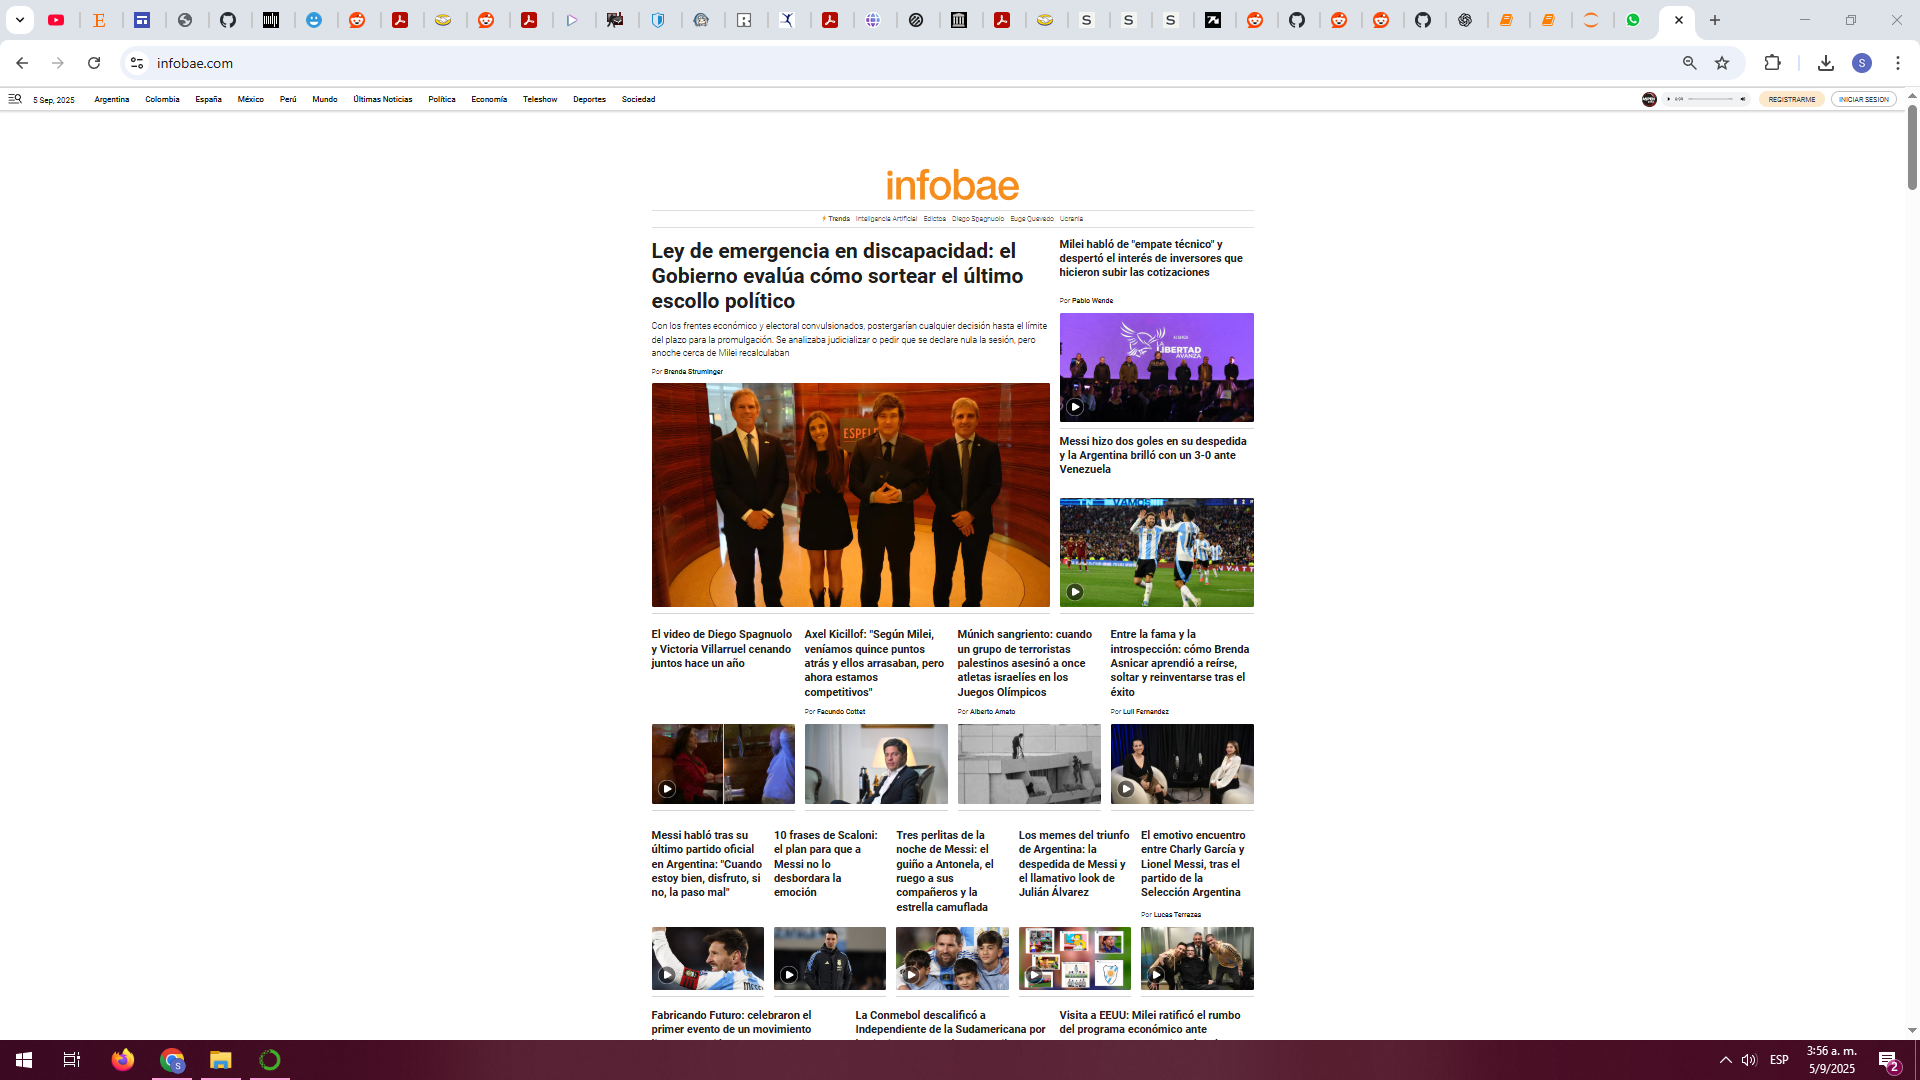

###### 4.4.2 Diferencias y similitudes en el web scraping de ambos portales

In [ ]:
La manera resolutiva es semejante a la del doario extranjero, pero con las etiquetas HTML que corresponde a cada diario. 
Los titulos del h2 entre otras caracteristicas pueden variar al igual que también el codigo utilizado. 
Para el primer caso nos salto un error y derivo difucultades a la hora del scraping, en cambio en el segundo caso no se presentaron dificultades

###### 4.4.3 Dificultades del web scraping y soluciones

<u>Del portal extranjero: </u> <br>
Tal como se explica en mayor detalle en el notebook completo, evidentemente el sitio web de The Washington Post está configurado para no permitir un parseo del HTML mediante código. Esto se manifestó de dos maneras:<br>
- Añadimos una clásula al código para que nos de aviso en caso de que el parseo resultara en un error, y dicho aviso nunca apareció (es decir que no falló el parseo);
- Lo que sí apareció fue un 'TimeOut Error' al reiniciar el kernel del notebook, ya que la celda de ejecución se quedaba "pensando" eternamente.

También se presentaron dificultades derivadas del proceso de scraping de los links: implicó entender que el atributo 'href' pertenece al tag 'a' de un HTML, por lo que primero había que identificar dicho tag en la función para luego pasar en limpio los links.

Por otra parte no se presentaron dificultades para scrapear el sitio nacional Infobae.